# Baseline Refresh Code Example

In this code we show how to implement a baseline refresh for the different exposure methods

1. Import modules

In [451]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import tkinter

In [452]:
def PSR_NGR(positions, addonfactor, singleposition):

    GrossExposure = 0
    CurrentExposure = 0
    NetExposure = 0
    AddOn_Gross = 0

    if singleposition == True:
        GrossExposure += max(0, positions[0])
        CurrentExposure += positions[0]
        AddOn_Gross += addonfactor * positions[1]
    else:
        for i in range(len(positions)):
            GrossExposure += max(0, positions[i,0])
            CurrentExposure += positions[i,0]
            AddOn_Gross += addonfactor * positions[i,1]

    NetExposure = max(0, CurrentExposure)

    if GrossExposure == 0:
        NGR = 0
    else:
        NGR = NetExposure/GrossExposure
    
    PSR = max(0, CurrentExposure) + NGR * (0.6) * (AddOn_Gross) + (0.4) * (AddOn_Gross)

    return PSR



def PSR_Conservative(positions, addonfactor):

    total_PSR_NGR = 0
    singleposition = True

    for i in range(len(positions)):
        total_PSR_NGR += PSR_NGR(positions[i,:], addonfactor, singleposition)
    
    return total_PSR_NGR

def PSR_Linear(positions, addonfactor):

    total_PSR_NGR = 0

    base_PSR_NGR = 0
    singleposition = True
    sample = positions[0,:]
    base_PSR_NGR += PSR_NGR(sample, addonfactor, singleposition)
    total_PSR_NGR = base_PSR_NGR

    singleposition = False

    for i in range(len(positions)-1):
        total_PSR_NGR += (PSR_NGR(positions[[0,i+1], :], addonfactor, singleposition) - base_PSR_NGR)

    return total_PSR_NGR


def PSR_Average(positions, addonfactor, n):

    total_PSR_NGR = 0
    base_PSR_NGR = 0

    singleposition = True
    base_PSR_NGR += PSR_NGR(positions[0,:], addonfactor, singleposition)
    total_PSR_NGR = base_PSR_NGR

    singleposition = False

    for i in range(len(positions)-1):

        # take out the baseline position and the x_i position
        trade_i = positions[[0,i+1], :]
        
        # multiply the i-th position by n - as it happens in the formula
        trade_i[1,:] *= n

        # multiply the formula by n
        total_PSR_NGR += 1/n*(PSR_NGR(trade_i, addonfactor, singleposition) - base_PSR_NGR)


    return total_PSR_NGR

In [453]:
def get_position_impacts(n, baseline_mtm):
    
    baseline_position = [baseline_mtm, 1000]
    mtm_notional_matrix = np.zeros((n,2))

    for i in range(n):

        mtm_notional_matrix[i,0] = random.randint(-3,3)
        mtm_notional_matrix[i,1] = abs(10*mtm_notional_matrix[i,0])
    
    positions = np.vstack([baseline_position, mtm_notional_matrix])
    

    '''
        positions = np.array([[10., 100.],
                [2., 20.],
                [-3., 30.],
                [-1., 10.],
                [-2., 20.],
                [-3., 30.],
                [0., 0.],
                [-1., 10.],
                [1., 10.],
                [-1., 10.],
                [3., 30.]])

'''

    return positions

position_impacts_state = {"n": 0, "data": None}

def update_position_impacts(n, baseline_mtm):
    global position_impacts_state
    if position_impacts_state["n"] != n:
        position_impacts_state["n"] = n
        position_impacts_state["data"] = get_position_impacts(n, baseline_mtm)

[110.0, 110.0, 112.2, 115.5, 115.5, 118.80000000000001, 118.80000000000001, 117.83944444444444, 116.87777777777778, 116.87777777777778, 117.97779816513761, 115.08623853211009, 115.4]


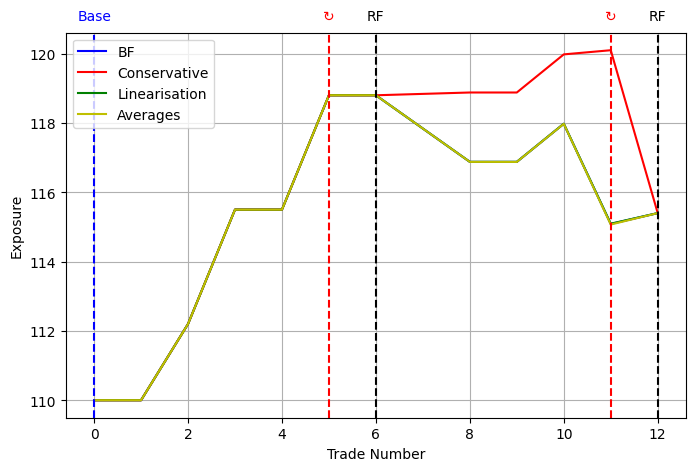

Positions Matrix 
 [[ 1.04e+02  1.14e+03]
 [ 0.00e+00  0.00e+00]
 [ 2.00e+00  2.00e+01]
 [ 3.00e+00  3.00e+01]
 [ 0.00e+00  0.00e+00]
 [ 3.00e+00  3.00e+01]
 [-1.00e+00  1.00e+01]
 [-1.00e+00  1.00e+01]
 [ 0.00e+00  0.00e+00]
 [ 1.00e+00  1.00e+01]
 [-3.00e+00  3.00e+01]]


BF list  [110.0, 110.0, 112.2, 115.5, 115.5, 118.80000000000001, 118.80000000000001, 117.83944444444444, 116.87777777777778, 116.87777777777778, 117.97779816513761, 115.08623853211009, 115.4]
Lin List [110.0, 110.0, 112.2, 115.50000000000001, 115.50000000000001, 118.80000000000003, 118.80000000000001, 117.83944444444444, 116.87888888888887, 116.87888888888887, 117.97888888888886, 115.09388888888884, 115.4]


Conservative List [110.0, 110.0, 112.2, 115.5, 115.5, 118.8, 118.80000000000001, 118.84000000000002, 118.88000000000002, 118.88000000000002, 119.98000000000002, 120.10000000000002, 115.4]
Average List [110.0, 110.0, 112.19999999999999, 115.5, 115.5, 118.8, 118.80000000000001, 117.83944444444444, 116.877777777777

In [454]:
def get_position_impacts_test(n=2):

    #baseline_position = [400, 2000]
    #mtm_notional_matrix = np.zeros((n,4))

    #mtm_notional_matrix[0,0] = 300
    #mtm_notional_matrix[1,0] = -400
    #mtm_notional_matrix[2,0] = 400
    #mtm_notional_matrix[3,0] = -400

    #mtm_notional_matrix[0,1] = 1000
    #mtm_notional_matrix[1,1] = 1000
    #mtm_notional_matrix[2,1] = 1000
    #mtm_notional_matrix[3,1] = 0

    baseline_position = [100,20]
    mtm_notional_matrix = np.zeros((n,2))

    mtm_notional_matrix[0,0] = -5
    mtm_notional_matrix[1,0] = 10

    mtm_notional_matrix[0,1] = 10
    mtm_notional_matrix[1,1] = 30

    positions = np.vstack([baseline_position, mtm_notional_matrix])
    
    print("Positions: ", positions)
    
    return positions


def exposure_simulation(n,m, addonfactor, baseline_mtm):
    

    update_position_impacts(n, baseline_mtm)
    positions = position_impacts_state["data"]
    
    #positions = get_position_impacts(n, baseline_mtm)

    singleposition = False

    bf_list = []
    cons_list = []
    lin_list = []
    avg_list = []

    bf_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
    lin_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
    cons_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
    avg_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))

    for i in range(int(n/m)):
        
        cumulative_positions = np.zeros((0, 2))  # empty to start
        cumulative_positions = np.vstack([cumulative_positions, positions[0, :]])

        for j in range(m):
            
            # Add the next position to the cumulative set
            cumulative_positions = np.vstack([cumulative_positions, positions[j+1 + m*i, :]])

            # Perform the PSR calculations for each strategy
            NGR_BF = PSR_NGR(cumulative_positions, addonfactor, singleposition)
            NGR_Lin = PSR_Linear(cumulative_positions, addonfactor)
            NGR_Cons = PSR_Conservative(cumulative_positions, addonfactor)
            NGR_Avg = PSR_Average(cumulative_positions, addonfactor, j+1)

            # Append results to respective lists
            bf_list.append(NGR_BF)
            lin_list.append(NGR_Lin)
            cons_list.append(NGR_Cons)
            avg_list.append(NGR_Avg)

        mtmRefresh = np.sum(cumulative_positions[:,0])
        notionalRefresh = np.sum(cumulative_positions[:,1])

        positions[0,0] = max(0,mtmRefresh)
        positions[0,1] = notionalRefresh

        bf_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
        lin_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
        cons_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))
        avg_list.append(PSR_NGR(np.array([positions[0,:]]), addonfactor, singleposition))

    print(bf_list)
    x = np.linspace(0, n+int(n/m), n+int(n/m)+1)


    if n % m == 0:
        
        plt.figure(figsize=(8,5))
        plt.grid(True)
        plt.plot(x, bf_list, 'b', label = "BF")
        plt.plot(x, cons_list, 'r', label = "Conservative")
        plt.plot(x, lin_list, 'g', label = "Linearisation")
        plt.plot(x, avg_list, 'y', label = "Averages")
        plt.xlabel("Trade Number")
        plt.ylabel("Exposure")


        for i in range(int(n/m)):

            vline_x = (i+1)*(m+1)
            ymin, ymax = plt.ylim()
            plt.axvline(vline_x, color='k', linestyle='--')
            vline_x2 = (i+1)*(m+1)-1
            ymin2, ymax2 = plt.ylim()
            plt.axvline(vline_x2, color='r', linestyle='--')
            plt.text(vline_x, ymax + (ymax - ymin)*0.025, 'RF', ha="center", va = "bottom", color="k")
            plt.text(vline_x2, ymax2 + (ymax2 - ymin2)*0.025, '↻', ha="center", va = "bottom", color="r")

        vline_start = 0
        ymin3, ymax3 = plt.ylim()
        plt.axvline(vline_start, color='b', linestyle='--')
        plt.text(vline_start, ymax3 + (ymax3 - ymin3)*0.025, 'Base', ha="center", va = "bottom", color="b")

        plt.legend()
        plt.show()

        print("Positions Matrix \n", positions)
        
        print("\n")
        
        print("BF list ", bf_list)
        print("Lin List", lin_list)
        
        print("\n")
        
        print("Conservative List", cons_list)
        print("Average List", avg_list)
    else:
        print("\n")
        print("ERROR: you must choose n and m such that m divides n (ie. n / m is a whole number)")




exposure_simulation(10,5, 0.01, 100)


In [455]:

interact(exposure_simulation,
         n=widgets.IntSlider(min=1, max=100, step=1, value=10, description="# of Trades"),
         m=widgets.IntSlider(min=1, max=100, step=1, value =5, description="Refresh Cycle"),
         addonfactor = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.01,description="AddOnFactor"),
         baseline_mtm = widgets.IntSlider(min=10, max=1000, step=5, value=100, description="MTM Baseline"),
         )

interactive(children=(IntSlider(value=10, description='# of Trades', min=1), IntSlider(value=5, description='R…

<function __main__.exposure_simulation(n, m, addonfactor, baseline_mtm)>